**Aim of the Project** Aim of the project is to Detection Of COVID-19 From Chest X-Rays, artificial intelligence in medicine is to provide composite, panoramic views of individuals’ medical data; to improve decision making, avoid errors such as misdiagnosis and unnecessary procedures, help in the ordering and interpretation of appropriate tests, and recommend treatment

**Background** It is a machine learning (ML) algorithm that tries to learn the features by itself. In simple words, ML is a subset of artificial intelligence (AI) and involves the study of computer algorithms that improve automatically using experience. A branch of machine learning, deep learning utilizes multilayer artificial neural networks inspired by the neurons (basic working unit) in the human brain. A deep neural network analyzes data (with learned representations) similar to the ways by which any of us would look at a complex problem..

**Business Requirement** Basically, here we are giving a number of chest x-ray images (examples — training data) to the machine and we inform it whether they indicate that the person is normal/ healthy or do they have possible COVID-19 traits. With more and more examples, the machine learns the relevant features. Now, if we give it a new chest x-ray, it tries to predict whether it is normal or does it have SARS-CoV-2 infection

**Suggested Approach** This model uses 12 layers of a neural network and has the advantage of learning the disease diagnosing features from x-ray images in an automatic manner. Utilizing the right combinations of algorithms and data, this tool is useful in terms of its rapidness and reliability. Moreover, it can further be trained and made available for wider use by the public

**Sources of Input**
The data available in the public domain was used to develop this tool. This information consisted of the normal chest x-ray features as well as those of other lung diseases such as pneumonia, tuberculosis, and so forth. As of now, there are a few examples (images) that are publically available for COVID-19. The researchers pooled all this data from different sources available on the Internet.

**Disclaimer **
Use only standard X-ray images.
It is an AI diagnose CVD-19 detector which works on only chest X-Ray.
Our model has 2049 distinct images from 1800 distinct patients, 708 COVID-19 images, Heathy patients XRay images, with this information our model is 95% accurate.
The intention of CVD-19 Detector is to be used as a reference model that can be built upon and enhanced as new data becomes available. We are currently at a research stage and not yet intended as production-ready models. It means we are not saying people to use as a direct clinical diagnosis. We are working continuously to improve our model as new data becomes available. Please do not use this model for self-diagnosis and seek help from your local health authorities.

#Mount the Google Drive to Google Colab


In [158]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Downloading the dataset directly to Google Drive via Google Colab
Import the required libraries and dataset
#Path for covid19-radiography-database


In [159]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile

datasetdir = "/content/drive/My Drive/COVID-19 Radiography Database/COVID-19 Radiography Database"
os.listdir(datasetdir)


['COVID-19',
 'NORMAL',
 'Viral Pneumonia',
 'COVID-19.metadata.xlsx',
 'NORMAL.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.matadata.xlsx']

## Preparing data for CNN
COVID-19 Radiography Database(3 directories, 4 files)


**About this directory**
Database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images.In our current realease, there are 219 COVID-19 positive images, 1341 normal images and 1345 viral pneuomonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients. Main objective is to researchers can use this database to produce useful and impactful scholarly work on COVID-19, which can help in tackling this pandemic.

In [160]:
normal_quantity=0
vpneumonia_quantity=0
covid_quantity=0
for dirname,_, filenames in os.walk(datasetdir):
  for filename in filenames:
      if filename.endswith('.png'):
          if 'NORMAL' in filename:
              normal_quantity +=1
          if 'Viral' in filename:
              vpneumonia_quantity +=1
          if 'COVID' in filename:
              covid_quantity +=1
print('Normal category quantity: ',normal_quantity)
print('Viral Pneumonia category quantity: ',vpneumonia_quantity)
print('COVID category quantity: ',covid_quantity)    
    
  

Normal category quantity:  1341
Viral Pneumonia category quantity:  1345
COVID category quantity:  219


No handles with labels found to put in legend.


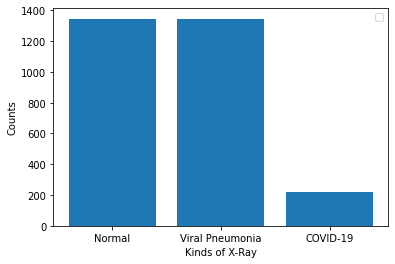

In [161]:
x = np.arange(3)
plt.bar(x, height=[(normal_quantity),(vpneumonia_quantity),(covid_quantity)])
plt.xticks(x, ['Normal','Viral Pneumonia','COVID-19'])
plt.xlabel('Kinds of X-Ray')
plt.ylabel('Counts')
plt.legend(loc='upper lef')
plt.show()

Result of the analyze is Pneumonia affe cted & Normal samples are quite more than others.

#**Visualization**

###Sample image for  “normal” (i.e., not infected) X-ray images from healthy patients.
###Load normal Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
### plot the first normal lung images from the dataset

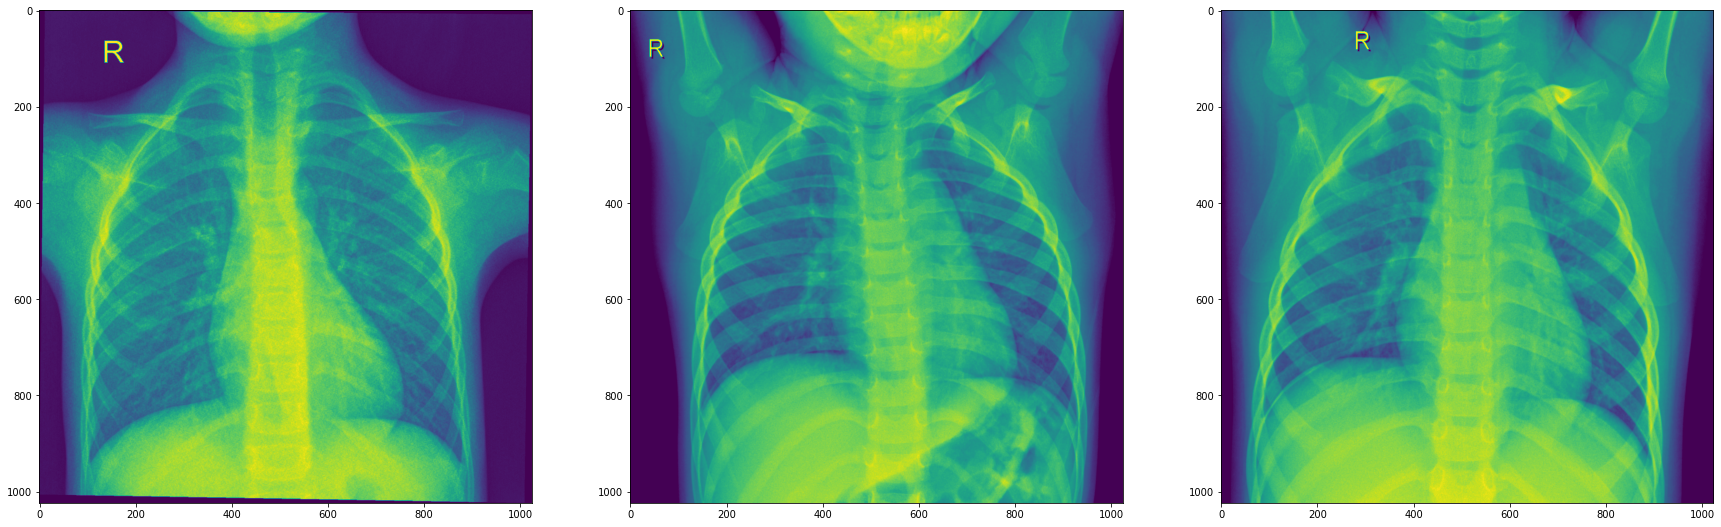

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(30,20))

ax1 = plt.subplot(131)
#cv2.imread('data/src/lena.jpg')
plt.imshow(mpimg.imread(datasetdir + "/NORMAL/NORMAL (764).png"))

ax2 = plt.subplot(132)
plt.imshow(mpimg.imread(datasetdir + "/NORMAL/NORMAL (277).png"))

ax3 = plt.subplot(133)
plt.imshow(mpimg.imread(datasetdir + "/NORMAL/NORMAL (121).png"))

plt.show()


###Sample X-ray images for patients who have tested positive for COVID-19
###Load Covid-19 Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
###plot the first image of covid-19 infection.

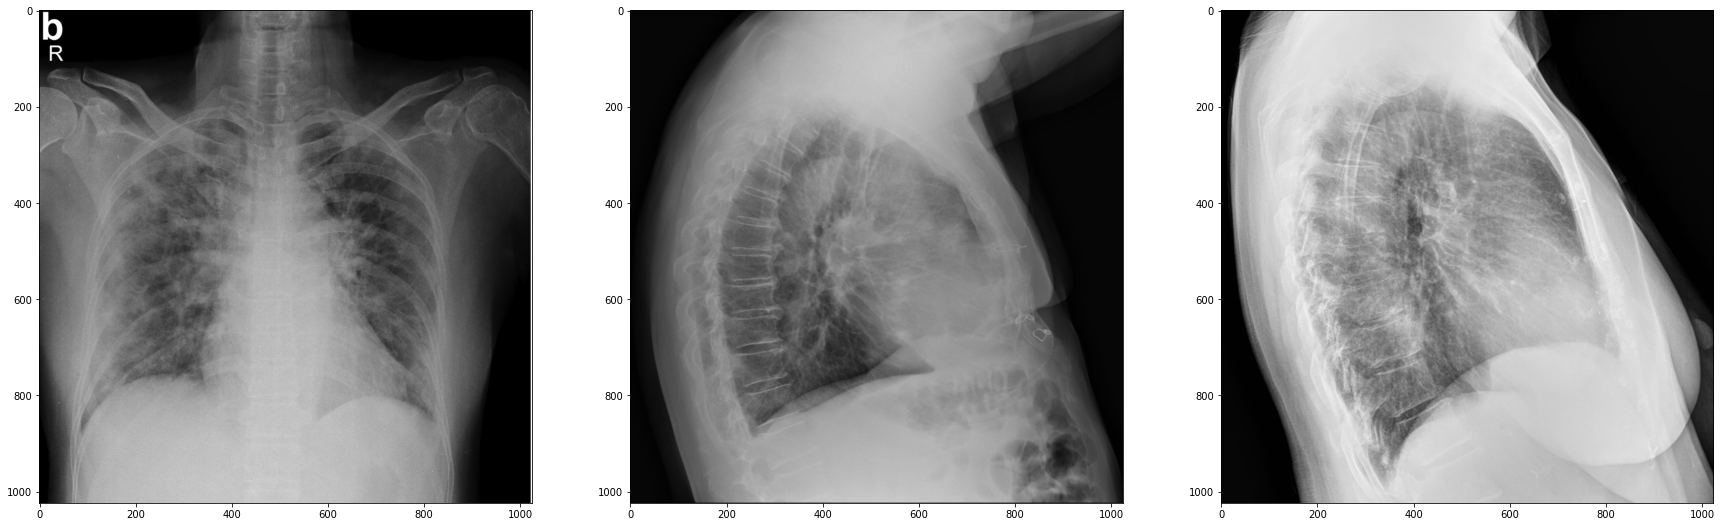

In [163]:
%matplotlib inline

plt.figure(figsize=(30,20))

ax1 = plt.subplot(131)
plt.imshow(mpimg.imread(datasetdir + "/COVID-19/COVID-19 (3).png"))

ax2 = plt.subplot(132)
plt.imshow(mpimg.imread(datasetdir + "/COVID-19/COVID-19 (27).png"))

ax3 = plt.subplot(133)
plt.imshow(mpimg.imread(datasetdir + "/COVID-19/COVID-19 (30).png"))

plt.show()

###Sample X-ray images for patients who have tested positive for Pneumonia
###Load pneumonia Images from Data set dir 
### we keep 280 images since there are only 219+58 images of covid-19, then the distribution of classes can be balanced.
### plot the first Viral Pneumonia image.

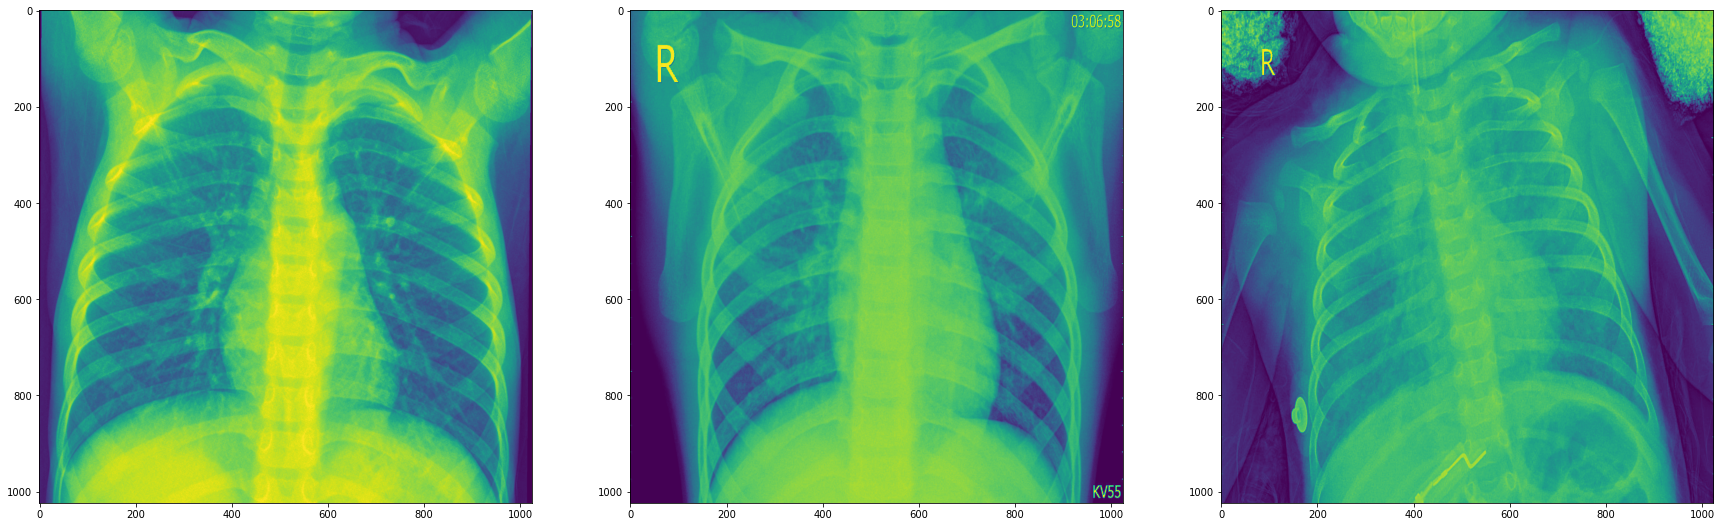

In [164]:
plt.figure(figsize=(30,20))

ax1 = plt.subplot(131)
plt.imshow(mpimg.imread(datasetdir + "/Viral Pneumonia/Viral Pneumonia (49).png"))

ax2 = plt.subplot(132)
plt.imshow(mpimg.imread(datasetdir + "/Viral Pneumonia/Viral Pneumonia (82).png"))

ax3 = plt.subplot(133)
plt.imshow(mpimg.imread(datasetdir + "/Viral Pneumonia/Viral Pneumonia (1114).png"))

plt.show()

#**Exploratory Data analysis**

In [167]:
#Let's test this hypothesis:
import cv2
print('Shape of image array using cv2.imread: ',cv2.imread(datasetdir + "/NORMAL/NORMAL (764).png").shape)
print('Shape of image array using mpimg.imread: ',mpimg.imread(datasetdir + "//NORMAL/NORMAL (764).png").shape)

Shape of image array using cv2.imread:  (1024, 1024, 3)
Shape of image array using mpimg.imread:  (1024, 1024)


###All Images Together 
### normal-> 0,
###covid-19-> 1,
### pneumonia-> 2

In [169]:
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
for i in pneumonia_images:
    images_together.append(img_to_array(i))

# normal-> 0, covid-19-> 1, pneumonia-> 2
targets = np.zeros((len(images_together), 3), int)
targets[:len(normal_images)] = [1, 0, 0]
targets[len(normal_images):] = [0, 1, 0]
targets[len(normal_images)+len(covid_images):] = [0, 0, 1]

In [170]:
Labels={'NORMAL':0,'PNEUMONIA':1,'COVID19':2}

# convert label to code
def getCode(label):
    return Labels[label]


# convert code to label 
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
            
#Test        
print(getCode('COVID19'))
print(getLabel(1))

2
PNEUMONIA


###Display the image list and target list length

In [171]:
print("image list length: ",len(images_together))
print("target list length: ",len(targets))

image list length:  781
target list length:  781


###Display Target shape

In [172]:
targets = np.array(targets)
print("targets: ",targets.shape)

targets:  (781, 3)


### Look at the shape of the images Together

In [173]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (781, 150, 150, 3)


#### Re-construct the dataset to meet the input dimensions.

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.2, stratify=targets)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

### Define HyperParameters

In [175]:
input_shape = (150, 150, 3)
num_classes = 3
epochs = 32
batch_size = 40

#Build Basic CNN Model

*   The CNN was trained using Keras, with the TensorFlow backend.
*   I used five convolutional blocks comprised of convolutional layer, max-pooling and batch-normalization.
*   On top of it I used a flatten layer and followed it by four fully connected layers.
*   Also in between I have used dropouts to reduce over-fitting.
*   Activation function was Relu throughout except for the last layer where it was Sigmoid as this is a binary classification problem.





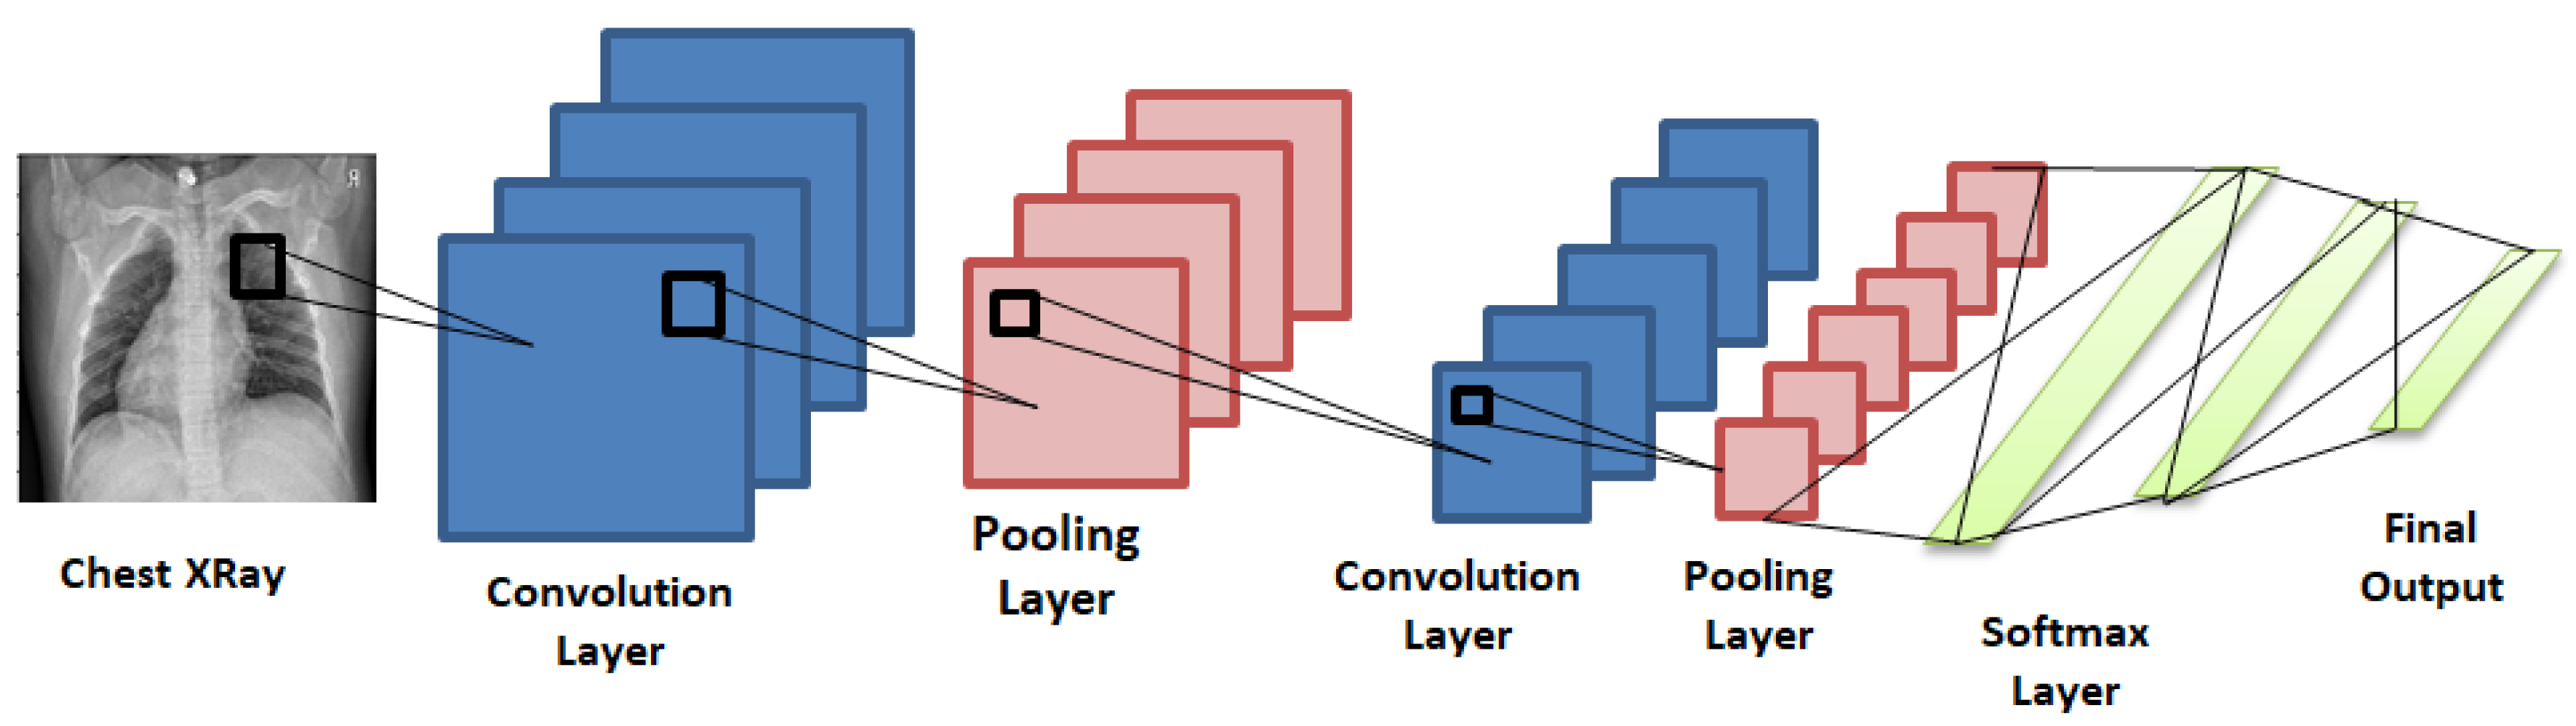

In [176]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = input_shape, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))



#compile the Model
I used categorical crossentropy loss function because I want to divide it into 3 classes at the exit. I tried the learning rate for different cases. When it is too small, training takes too long, so I increased the learning rate. I used RMSprop becuase RMSprop automates learning-rate tuning (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training,and would work equally well here)

In [177]:
# compile 
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

#Model Summary 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 33, 33, 64)       

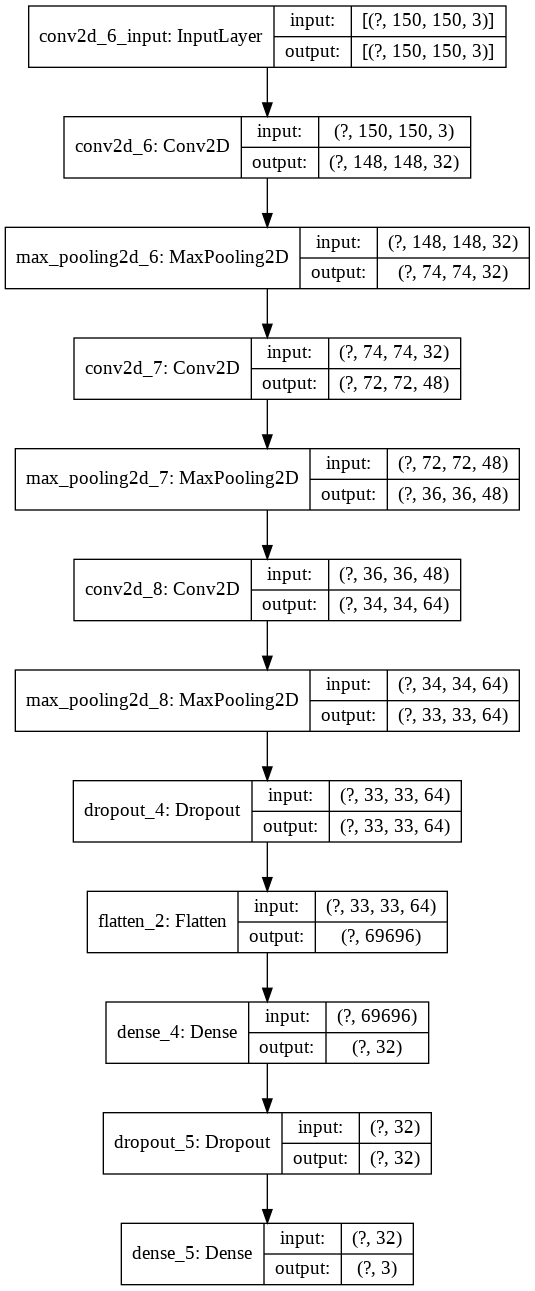

In [178]:
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model, show_shapes=True, to_file='model_densenet_efnet_vgg.png')

#Model Training

In [179]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#**Standardize the data**
#ImageDataGenerator (DataAugmentation )
### Create iterable training set with Data Augmentation methodologies such as rescale, shear, zoom and filp the data.

The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer. These images come in all shapes and sizes. Before training neural network need to tweak the images

data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range). In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [180]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.2)
validation_generator = ImageDataGenerator( rescale = 1.0/255.)

# Training iterable
# validation iterable
##Train the model using GPU acceleration

In [181]:
train_generator = train_datagen.flow(
images_together, targets,
batch_size = batch_size,
subset = "training")


validation_generator = train_datagen.flow(
images_together, targets,
batch_size = batch_size,
shuffle = False,
subset = "validation")

#Compile the model

with tf.device('/GPU:0'):
    hist = model.fit_generator(
    train_generator,
    steps_per_epoch = (450*0.8)//batch_size,
    validation_data = validation_generator,
    validation_steps = (450*0.2)// batch_size,
    epochs = epochs)

Epoch 1/32
9/9 [==============================] - 3s 283ms/step - loss: 2.3025 - accuracy: 0.3167 - val_loss: 1.0817 - val_accuracy: 0.4125
Epoch 2/32
9/9 [==============================] - 2s 244ms/step - loss: 1.0876 - accuracy: 0.4000 - val_loss: 1.0972 - val_accuracy: 0.3375
Epoch 3/32
9/9 [==============================] - 2s 255ms/step - loss: 1.0586 - accuracy: 0.3917 - val_loss: 1.0424 - val_accuracy: 0.4750
Epoch 4/32
9/9 [==============================] - 2s 251ms/step - loss: 0.9954 - accuracy: 0.4861 - val_loss: 0.8606 - val_accuracy: 0.6500
Epoch 5/32
9/9 [==============================] - 2s 253ms/step - loss: 0.9505 - accuracy: 0.5472 - val_loss: 0.8339 - val_accuracy: 0.6625
Epoch 6/32
9/9 [==============================] - 2s 251ms/step - loss: 0.8982 - accuracy: 0.5750 - val_loss: 0.9033 - val_accuracy: 0.6125
Epoch 7/32
9/9 [==============================] - 2s 243ms/step - loss: 0.7657 - accuracy: 0.7072 - val_loss: 0.8663 - val_accuracy: 0.6250
Epoch 8/32
9/9 [====

#**Visualize training results**

# plot the model accuracy changes through training

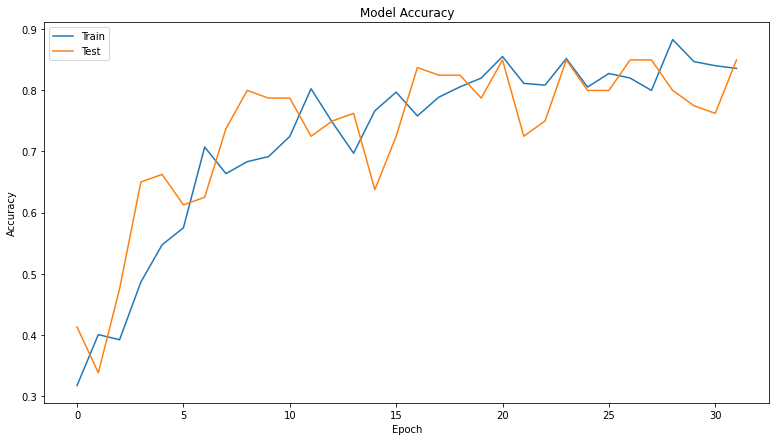

In [182]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
#plt.text(23,0.5,"Current Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
#plt.text(23,0.46,"Current Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
plt.show()

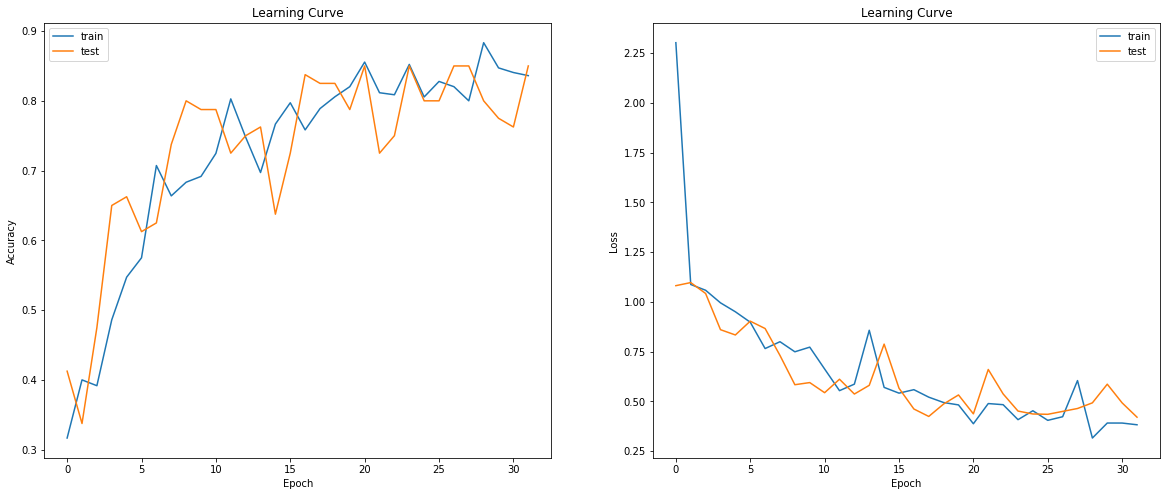

In [183]:
def draw_learning_curve(hist, keys=['accuracy', 'loss']):
    plt.figure(figsize=(20,8))
    for i, key in enumerate(keys):
        plt.subplot(1, 2, i + 1)
        sns.lineplot(x = hist.epoch, y=hist.history[key])
        
        sns.lineplot(x = hist.epoch, y = hist.history['val_' + key])
        plt.title('Learning Curve')
        plt.ylabel(key.title())
        plt.xlabel('Epoch')
#         plt.ylim(ylim)
        plt.legend(['train', 'test'], loc='best')
    plt.show()
draw_learning_curve(hist)

#Display Training and Validation Accuracy

In [184]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")



Training Accuracy: 83.61%
Validation Accuracy: 85.0%


In [185]:
test_loss, test_acc = model.evaluate( X_val,  y_val, verbose=2)
print('Model accuracy: ',test_acc)

score = model.evaluate(X_val,  y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


5/5 - 0s - loss: 34.8222 - accuracy: 0.8726
Model accuracy:  0.8726114630699158
Test loss: 34.8221549987793
Test accuracy: 0.8726114630699158


In [186]:
y_pred = model.predict(X_val)
print(y_pred[1])
print(len(y_pred))

[1. 0. 0.]
157


In [187]:
y_test=[]
for i in range(4):
    y_test.extend(validation_generator.__getitem__(i)[1])
#print(len(y_test))
y_test=np.array(y_test)
y_test=np.argmax(y_test,axis=1)
pred= np.argmax(y_pred,axis=1)
print("pred \n",len(pred))
print("y_test \n",len(y_test))

156
pred 
 157
y_test 
 156


#Evaluation 

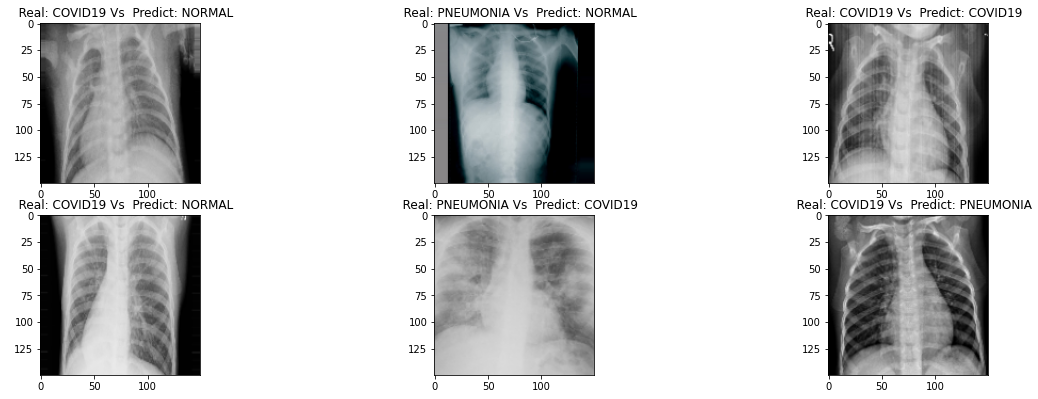

In [199]:
plt.figure(figsize=(20,10))
for i in range(0,6):
    
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(validation_generator.__getitem__(0)[0][i])
    plt.title(f"   Real: {getLabel(y_test[i])   } Vs  Predict: {getLabel(pred[i])}")

#We will use a confusion matrix to better visualize our predicted vs true values for the validation data.

#Confusion Matrix

In [146]:
y_test_labels = np.argmax(y_val, axis=1)
print(y_test_labels)
print(len(y_test_labels))


[1 0 2 2 2 1 0 0 2 2 2 0 2 2 1 2 1 0 1 0 1 2 2 2 0 0 1 2 0 0 1 0 2 1 0 1 0
 2 1 0 1 1 0 1 0 0 2 0 1 2 0 0 2 1 0 1 2 0 2 0 0 0 2 1 0 2 2 1 2 2 1 2 2 2
 2 2 0 2 0 0 0 2 1 1 1 0 0 0 2 0 0 1 0 1 1 1 2 2 2 0 0 2 0 1 1 1 0 0 2 2 2
 0 1 2 1 0 2 2 2 0 0 1 1 0 2 2 1 1 1 0 1 0 2 2 0 2 2 2 2 0 0 0 2 2 1 1 1 2
 0 2 0 0 2 0 1 1 1]
157


In [145]:
y_pred = np.argmax(model.predict(X_val), axis=1)
print(y_pred)
print(len(y_pred))


[1 0 2 2 2 1 0 0 2 2 2 0 2 2 2 2 1 0 1 0 1 2 2 2 0 0 2 2 0 0 2 0 2 1 0 1 2
 2 2 0 1 0 0 1 2 2 2 0 1 2 0 0 2 1 0 1 2 0 2 2 0 2 2 1 0 2 2 1 2 2 1 0 2 2
 2 2 0 2 0 0 2 2 1 1 1 0 0 0 2 0 0 1 0 1 2 2 2 2 2 0 0 2 0 1 2 1 0 0 2 2 2
 0 1 2 1 0 2 2 2 0 0 2 1 0 2 2 1 1 1 0 1 0 2 2 0 2 2 2 2 0 0 0 2 2 1 1 2 2
 0 2 0 0 2 0 1 1 0]
157


In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_pred)
print(cm)
from sklearn.metrics import classification_report
target_names = ['COVID-19', 'Normal',"pneumonia"]
print(classification_report(y_test_labels, y_pred, target_names=target_names))
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("acc: {:.4f}".format(acc*100))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[50  0  6]
 [ 2 33  9]
 [ 1  0 56]]
              precision    recall  f1-score   support

    COVID-19       0.94      0.89      0.92        56
      Normal       1.00      0.75      0.86        44
   pneumonia       0.79      0.98      0.88        57

    accuracy                           0.89       157
   macro avg       0.91      0.88      0.88       157
weighted avg       0.90      0.89      0.89       157

acc: 52.8662
sensitivity: 1.0000
specificity: 0.9429


In [148]:
exp_series = pd.Series(y_pred)
pred_series = pd.Series(y_test_labels)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
Actual,,,,
0,50,2,1,53
1,0,33,0,33
2,6,9,56,71
All,56,44,57,157


#Heat MAP

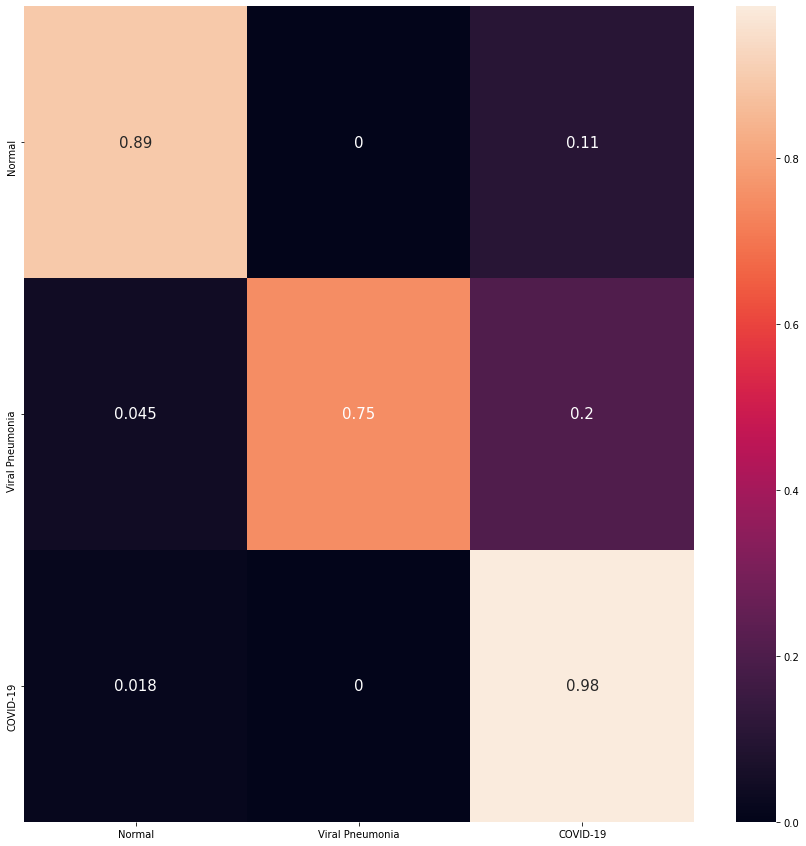

In [122]:
import seaborn as sns
conf_matrix = pd.DataFrame(cm, index = ['Normal','Viral Pneumonia','COVID-19'],columns = ['Normal','Viral Pneumonia','COVID-19'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})